### **Import and load**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Image dimension ---->28*28
Gray sclae image ----> 1 channel

In [3]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


### **Display the image**

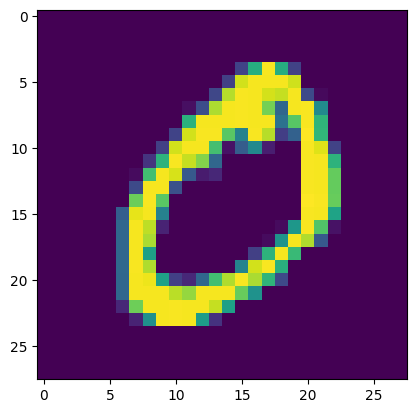

0


In [4]:
# Display
plt.imshow(X_train[1])
plt.show()
# print the number
print((y_train[1]))

In [5]:
# unique value in y_train
print(np.unique(y_train))
# unique value in y_train
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


all the images have the common dimension if not we have to resize the dimension

In [17]:
max_arr = np.max(X_train)

In [18]:
X_train = X_train/max_arr
X_test = X_test/max_arr

### **Building the nueral network**

In [21]:
# setting up the layer for neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(10, activation= "sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy", "precision", "recall"])

In [69]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


AttributeError: 'NoneType' object has no attribute 'items'

Train data accuracy--> 98.9 %

2


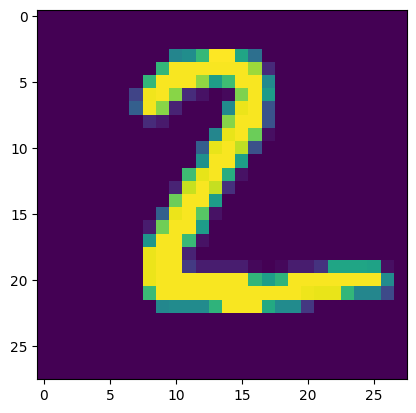

In [27]:
plt.imshow(X_test[1])
print(y_test[1])

In [28]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
print(y_pred[1])

[3.3043032e-03 8.6390394e-01 9.9999958e-01 2.7261010e-01 1.1184649e-12
 5.3390205e-02 7.1169430e-04 4.9309048e-04 2.4904113e-02 3.9989332e-05]


model.predict() gives the probability of each class for the data point

In [35]:
label_for_test_image = np.argmax(y_pred[1])
print(label_for_test_image)

2


In [36]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 3, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### **Confusion_matrix**

In [37]:
cm= confusion_matrix(y_test, y_pred_label)

In [38]:
print(cm)

tf.Tensor(
[[ 968    1    2    2    2    3    0    0    1    1]
 [   0 1123    6    2    0    0    1    0    3    0]
 [   6    3 1014    1    2    0    0    2    3    1]
 [   0    2    9  987    0    3    0    3    4    2]
 [   3    1    3    0  952    0    7    1    2   13]
 [   2    1    1   25    1  848    4    0    7    3]
 [   6    3    3    1    7    4  930    0    4    0]
 [   0   14   19    4    2    0    0  973    4   12]
 [   2    1   13    4    5    2    3    4  936    4]
 [   2    4    1    5   14    3    1    5    6  968]], shape=(10, 10), dtype=int32)


Text(220.72222222222223, 0.5, 'truth')

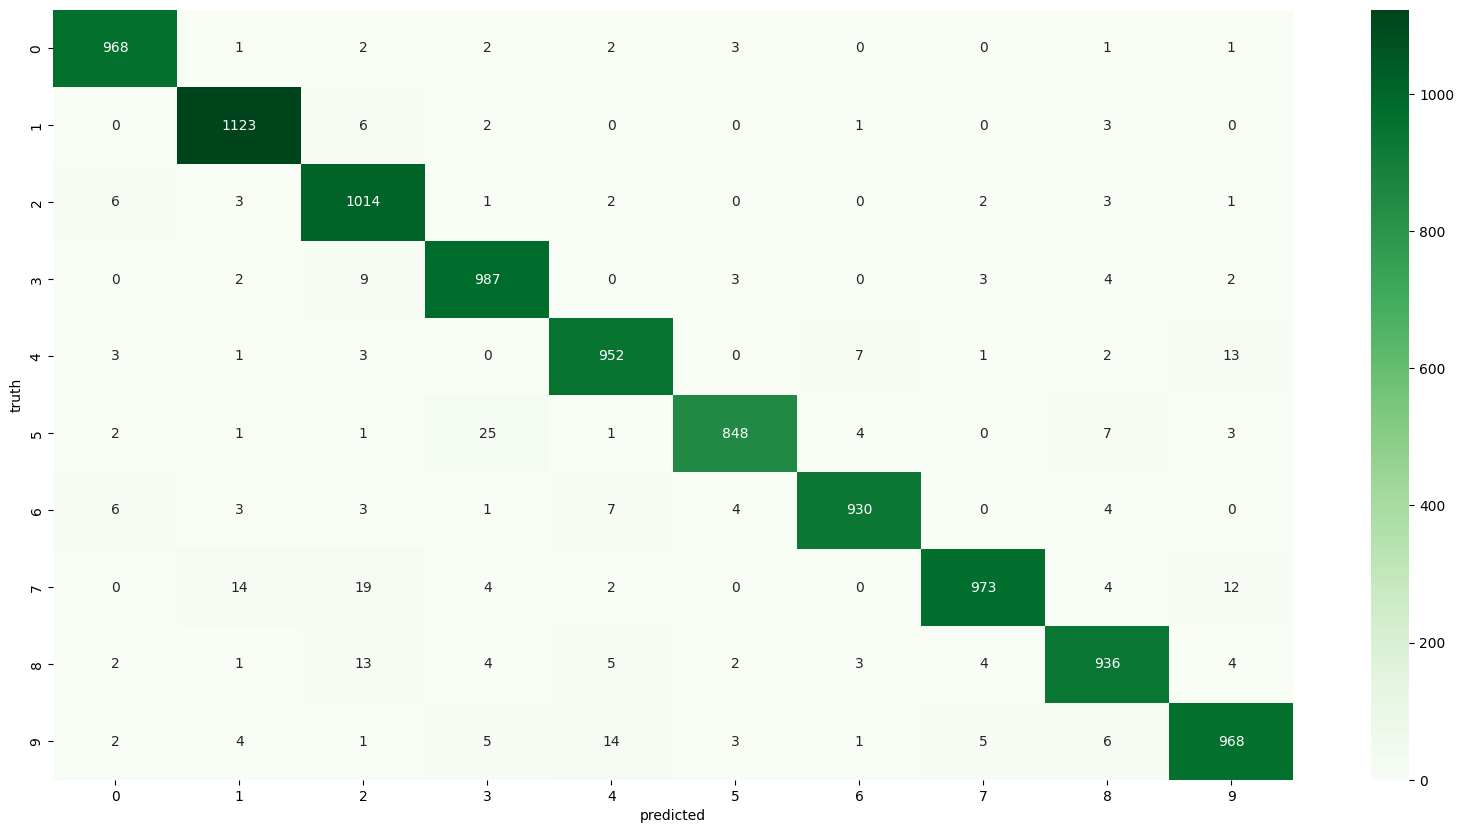

In [45]:
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot = True, fmt="d", cmap = "Greens")
plt.xlabel("predicted")
plt.ylabel("truth")

### **predicting the sample**

In [46]:
! wget "https://i.sstatic.net/08u77.png"

--2024-12-12 12:00:36--  https://i.sstatic.net/08u77.png
Resolving i.sstatic.net (i.sstatic.net)... 172.64.146.223, 104.18.41.33
Connecting to i.sstatic.net (i.sstatic.net)|172.64.146.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3863 (3.8K) [image/png]
Saving to: ‘08u77.png’

08u77.png           100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-12-12 12:00:36 (44.3 MB/s) - ‘08u77.png’ saved [3863/3863]



In [47]:
input_image = cv2.imread("/content/08u77.png")

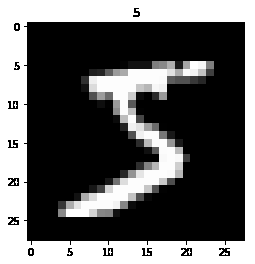

In [48]:
cv2_imshow(input_image)

In [49]:
input_image.shape

(264, 255, 3)

In [50]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [51]:
grayscale.shape

(264, 255)

In [52]:
image_resize = cv2.resize(grayscale, (28,28))

In [53]:
image_resize.shape

(28, 28)

In [54]:
cv2_imshow(image_resize)

In [63]:
image_resize = image_resize/max_arr

In [64]:
image_reshape = np.reshape(image_resize, [1,28,28])

In [65]:
input_prediction = model.predict(image_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [66]:
print(np.argmax(input_prediction))

7


wrong prediction, the output is wrong